# Trippy Test

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

In [1]:
import datajoint as dj
import numpy as np
import os
from stimulus import stimulus
from pipeline import fuse

Connecting dimitri@at-database.ad.bcm.edu:3306
Loading local settings from pipeline_config.json
Could not find cv2. You won't be able to use the pupil tracker.


In [6]:
import monet_trippy as mt

In [7]:
# sessions that have both Monet and Trippy from a few recent experiments
sessions = (fuse.Activity * stimulus.Sync & 'animal_id in (20505, 20322, 20457, 20210, 20892)'
            & (stimulus.Trial * stimulus.Monet2) & (stimulus.Trial * stimulus.Trippy)).fetch('KEY')
key = sessions[2]   # pick one

pipe = (fuse.Activity() & key).module
num_frames = (pipe.ScanInfo() & key).fetch1('nframes')
num_depths = len(dj.U('z') & (pipe.ScanInfo.Field().proj('z', nomatch='field') & key))
frame_times = (stimulus.Sync() & key).fetch1('frame_times', squeeze=True) # one per depth
assert num_frames <= frame_times.size / num_depths <= num_frames + 1
frame_times = frame_times[:num_depths * num_frames:num_depths]  # one per volume

trace_hash = dj.hash.key_hash({k: v for k, v in key.items() if k not in {'stimulus_type'}})
archive = os.path.join('cache', trace_hash + '-traces.npz')
if os.path.isfile(archive):
    data = np.load(archive)
    trace_keys = data['trace_keys']
    traces = data['traces']
    ms_delay = data['ms_delay']
else:
    units = pipe.ScanSet.Unit * pipe.MaskClassification.Type & {'type': 'soma'}
    spikes = pipe.Activity.Trace * pipe.ScanSet.UnitInfo & units & key
    trace_keys, traces, ms_delay = spikes.fetch('KEY', 'trace', 'ms_delay')
    np.savez_compressed(archive, trace_keys=trace_keys, traces=traces, ms_delay=ms_delay)
frame_times = np.add.outer(ms_delay / 1000, frame_times)  # num_traces x num_frames


In [24]:
trippy_session = mt.VisualSession(np.stack(traces), frame_times)
for trial in (stimulus.Trial * stimulus.Condition * stimulus.Trippy & key).proj(..., '- movie'):
    trippy_session.add_trial(mt.Trippy.from_condition(trial), trial['flip_times'].flatten())

In [25]:
rf = trippy_session.compute_receptive_field()

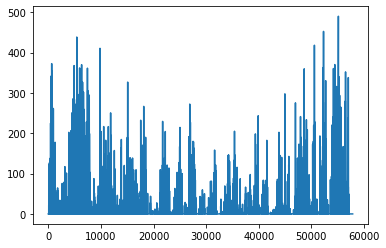

In [41]:
plt.plot(trippy_session.traces[25,:])

In [10]:
from skimage import transform 

In [11]:
m = trippy_session.trials[0]['stimulus'].movie

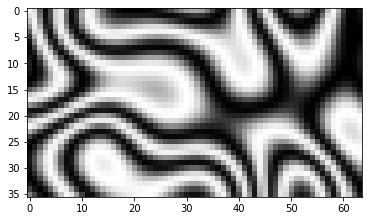

In [14]:
plt.imshow(transform.resize(np.rollaxis(m, 0, 3), (36, 64), anti_aliasing=True)[:,:,110], cmap='gray')

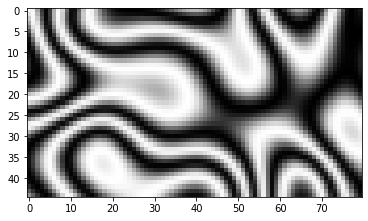

In [15]:
plt.imshow(transform.resize(np.rollaxis(m, 0, 3), (45, 80), anti_aliasing=True)[:,:,110], cmap='gray')

In [16]:
(transform.resize(np.rollaxis(m, 0, 3), (9, 16), anti_aliasing=True, order=1)[:,:,110]).mean()

0.5174564270152506

In [17]:
3*3, 2*2*2*2

(9, 16)

In [18]:
help(transform.resize)

Help on function resize in module skimage.transform._warps:

resize(image, output_shape, order=1, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=True, anti_aliasing_sigma=None)
    Resize image to match a certain size.
    
    Performs interpolation to up-size or down-size images. Note that anti-
    aliasing should be enabled when down-sizing images to avoid aliasing
    artifacts. For down-sampling N-dimensional images with an integer factor
    also see `skimage.transform.downscale_local_mean`.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    output_shape : tuple or ndarray
        Size of the generated output image `(rows, cols[, ...][, dim])`. If
        `dim` is not provided, the number of channels is preserved. In case the
        number of input channels does not equal the number of output channels a
        n-dimensional interpolation is applied.
    
    Returns
    -------
    resized : ndarray
        Resized version o

In [ ]:
m = trippy.movie

In [ ]:
help(np.rollaxis)

In [ ]:
os.path.abspath('os')

In [ ]:
np.rollaxis(m[:10,:10],2).shape

In [ ]:
trippy = trippytune.Trippy.from_condition(cond)

In [ ]:
plt.imshow(trippy.movie[:,:,300], cmap='gray')

In [ ]:
import imageio

In [ ]:
help(imageio.mimwrite)

In [ ]:
assert 0 == abs(trippy.movie - (stimulus.Trippy & key).fetch1('movie')).max(),\
    "Python implementation diverged from MATLAB"

In [ ]:
plt.imshow(trippytune.Trippy.from_condition(cond).movie[:,:,300])

In [ ]:
 d = dict(a=3)

In [ ]:
d

In [ ]:
import networkx as nx

In [ ]:
networkx.__version__

In [ ]:
help(nx.algorithms.dag.topological_sort)